## Проект спринт 13
**Название проекта**:  
Хоть потоп  
_____
**Описание исследования**:  
Разработка метода преобразования данных, чтобы по ним было сложно восстановить персональную информацию  
_____
**Цель исследования**:  
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.  
_____
**План исследования.**  
[Шаг 1. Загрузка и подготовка данных](#step1)  
[Шаг 2. Исследование умножения параметров на обратимую матрицу](#step2)  
[Шаг 3. Предложение по алгоритму преобразования данных](#step3)  
[Шаг 4. Реализация алгоритма](#step4)  
_____
**Исходные данные.**
Набор данных:  
- [insurance.csv](insurance.csv) - исходные данные

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту за последние 5 лет.


<a id='step1'></a>
## Шаг 1. Загрузка и подготовка данных

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('insurance.csv')
df.sample(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
1460,0,33.0,52900.0,3,0
1773,1,26.0,45000.0,2,0
1393,1,40.0,39800.0,1,0
3212,1,28.0,22700.0,1,0
4387,1,28.0,61500.0,2,0
4022,1,22.0,42700.0,1,0
4262,1,45.0,30200.0,3,1
1173,0,39.0,21600.0,2,0
2620,1,32.0,33300.0,2,0
2188,1,21.0,25900.0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


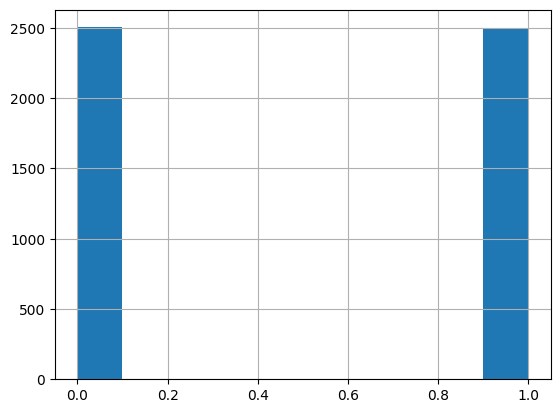

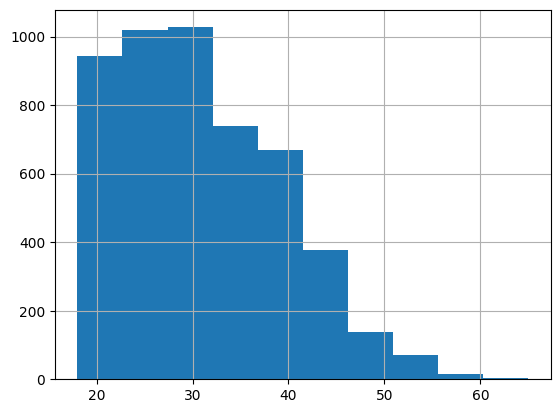

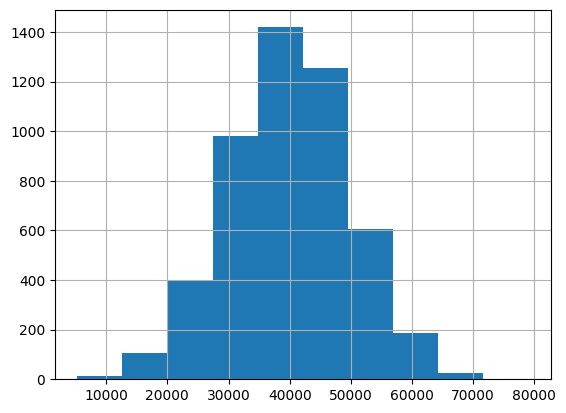

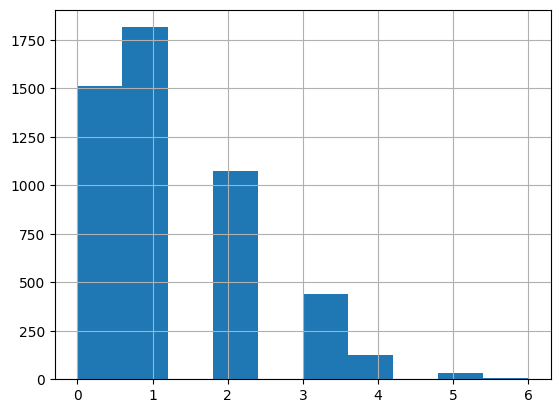

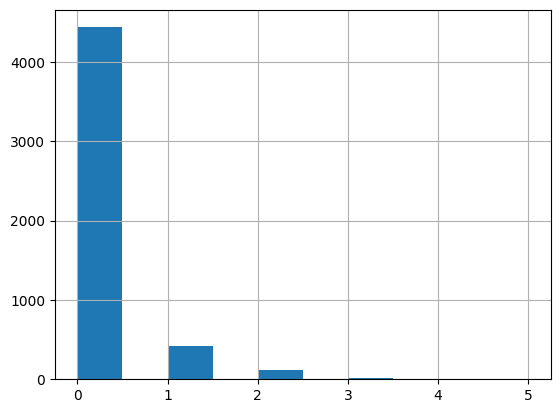

In [7]:
for item in df.columns:
    df[item].hist()
    plt.show()

Основные выводы:  
данные приведены к целевым типам и подготовлены для обучения модели  
параметры можно считать персональными данными

<a id='step2'></a>
## Шаг 2. Исследование умножения параметров на обратимую матрицу


In [12]:
features = df.drop(columns=['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

In [16]:
initial_model = LinearRegression()
initial_model.fit(features, target)
initial_model.score(features, target)

0.42494550286668

In [19]:
d = len(features.columns)
m = np.random.rand(4, 4)
print(m)
m_inv = np.linalg.inv(m)
print(m_inv)

[[4.54361482e-01 8.87294895e-01 1.76928981e-01 5.93516224e-01]
 [9.89140516e-01 3.45016579e-01 5.87263664e-01 7.52204640e-01]
 [4.46945434e-01 2.17866815e-01 1.32533073e-01 4.96546545e-01]
 [7.55372294e-05 7.33648409e-01 3.54870341e-01 4.39260791e-01]]
[[ 1.67596042  1.13319891 -1.97392268 -1.97368558]
 [ 1.85080635  0.09509267 -2.09191655 -0.29886302]
 [-1.42497727  1.66867863 -2.24462325  1.60524056]
 [-1.94027234 -1.50711092  5.30762275  1.479206  ]]


In [33]:
f_np = np.array(features)
f_np[1, :]
f_inv_np = []
for i in range(len(f_np)):
    f_inv_np.append(m @ f_np[i, :])
# f_inv_np
features_inv = pd.DataFrame(f_inv_np, columns=features.columns)

In [35]:
inv_model = LinearRegression()
inv_model.fit(features_inv, target)
inv_model.score(features_inv, target)

0.42494550286669164

<a id='step3'></a>
## Шаг 3. Предложение по алгоритму преобразования данных

<a id='step4'></a>
## Шаг 4. Реализация алгоритма